## Create dataloader

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import skimage
from data_loader import MyDataset
from torch.utils.data import DataLoader
from models.unet import UNet, PretrainedUNet

In [79]:
labels_path = "/Users/ngandige/Documents/stardist/StarDist-Lizard/data/labels.npy"
images_path = "/Users/ngandige/Documents/stardist/StarDist-Lizard/data/images.npy"
dataset = MyDataset(images_path, labels_path)
dataset_size = len(dataset)
print(dataset_size)

4981


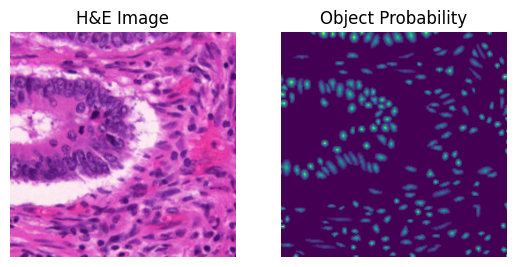

In [149]:
test_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)
data = next(iter(test_loader))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('H&E Image')  
plt.imshow(data[0][0].permute(1,2,0))
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Object Probability') 
plt.imshow(data[1][0])
plt.show()


In [117]:
model = UNet(3, 2)

In [151]:
# convert data to torch.FloatTensor
output = model(data[0])

In [152]:
output.shape

torch.Size([1, 2, 256, 256])